In [2]:
import h5py
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from skimage.segmentation import find_boundaries

In [3]:
# Read in the membrane segmentation
with open('./data/20210928Xenograft_masks_mem.npy', 'rb') as m:
    masks_mem = np.load(m)

In [4]:
df_cell_id = pd.read_csv("./result/crisprmap20210928xenograft.csv")
df_cell_id

,barcode,correlation_max,correlation_2nd_max,correlation_difference,select_by_correlation,spots_max,spots_sum,spots_needed,select_by_spots,selected,cells_with_spots
0,-1,0.000000,0.000000,0.000000,False,0.0,0.0,31395550336760,False,False,False
1,0,0.707106,0.707106,0.000000,False,1.0,1.0,13,False,False,True
2,2,0.999999,0.499999,0.499999,True,1.0,2.0,3,False,False,True
3,0,0.948682,0.632455,0.316227,True,2.0,3.0,5,False,False,True
4,0,0.632455,0.632455,0.000000,False,1.0,5.0,17,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4205,-1,0.000000,0.000000,0.000000,False,0.0,0.0,31395550336760,False,False,False
4206,1,0.707106,0.000000,0.707106,True,6.0,6.0,13,False,False,True
4207,-1,0.000000,0.000000,0.000000,False,0.0,0.0,31395550336760,False,False,False
4208,-1,0.000000,0.000000,0.000000,False,0.0,0.0,31395550336760,False,False,False


In [5]:
cell_id = np.array(df_cell_id.barcode).ravel()
cell_id

array([-1,  0,  2, ..., -1, -1, -1])

In [6]:
set(cell_id)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
# plt.figure(dpi=200)
# plt.imshow(find_boundaries(masks_mem), origin='lower')
# plt.axis('image')

In [8]:
color_dict = {
    0: (0,0,255),
    1: (0,255,0),
    2: (255, 0, 0),
    3: (0,255,255),
    4: (255,0,255),
    5: (255,255,0),
    6: (255,127,0),
    7: (0,127,0),
    8: (127,0,0),
    9: (255,255,255)
}

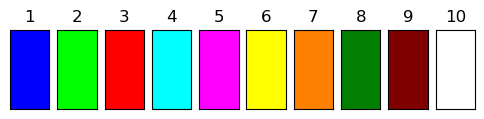

In [5]:
color_box = np.zeros((10, 5, 3))
plt.figure(dpi=100)  
for i in range(10): 
    plt.subplot(1, 10, i+1)
    color_box[:, :, :] = color_dict[i]
    plt.imshow(color_box.astype(np.uint8))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.title(i+1)

## All asigned

In [6]:
mask = np.zeros(masks_mem.shape)
for i, l in enumerate(cell_id[1:]):
    mask[masks_mem==i+1] = l+1  # avoid label l being 0 because the background is 0
    # i+1 because index still starts with 0
#     print(i)
#     print(l)
    
# mask /= 10

In [9]:
np.unique(mask)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [7]:
# plt.figure(dpi=300)
# plt.imshow(mask)
# plt.axis('image')

In [9]:
up = 10
down = 1500
left = 30
right = 990

mask_color = np.zeros((*mask.shape, 3))
for i in range(len(color_dict)): 
    mask_color[mask==i+1] = color_dict[i]
    
mask_color = mask_color[up:down, left:right]
mask_color[find_boundaries(masks_mem[up:down, left:right]),] = (127, 127, 127)

In [24]:
mask_color.shape

(1792, 2304, 3)

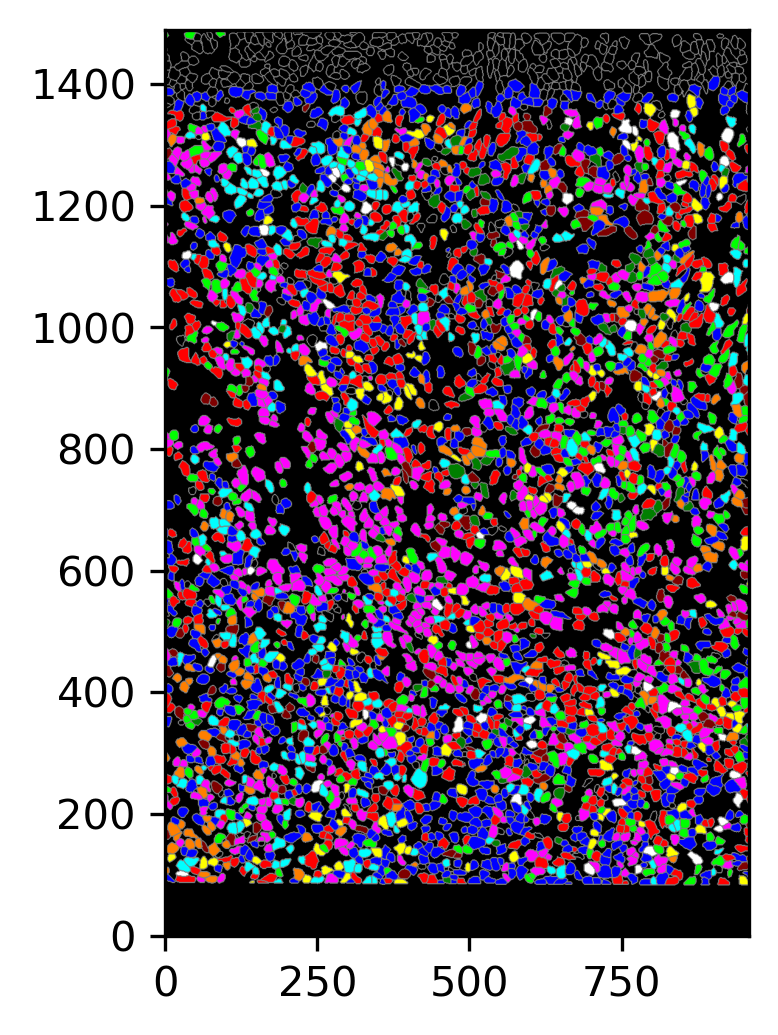

In [10]:
plt.figure(dpi=300)    
plt.imshow(mask_color.astype(np.uint8), origin='lower')

## Without double infected
nd

In [32]:
# mask_nd = np.zeros(masks_mem.shape)
# for i, l in enumerate(cell_id[1:]):
# #     if df_cell_id.select_by_correlation[i]==True:
# #     if df_cell_id.correlation_difference[i]>0.26:
#     mask_nd[masks_mem==i+1] = l+1

In [33]:
# mask_color_nd = np.zeros((*mask_nd.shape, 3))
# for i in range(len(color_dict)): 
#     mask_color_nd[mask_nd==i+1] = color_dict[i]

Text(0.5, 1.0, 'Double infection removed')

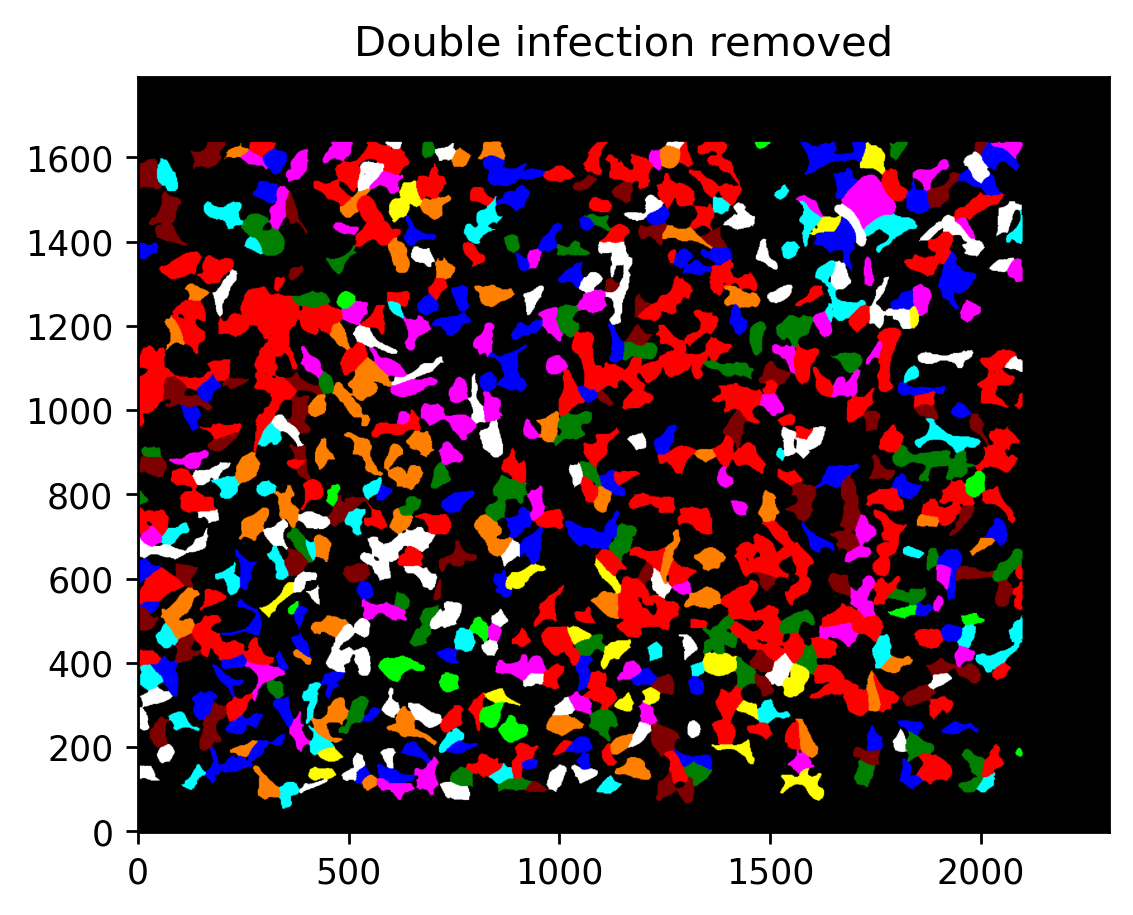

In [16]:
no_double = df_cell_id.barcode[df_cell_id.select_by_correlation==True]
mask_color_nd = np.zeros((*masks_mem.shape, 3))
for i in no_double.index:
    if i>0:
        mask_color_nd[np.array(masks_mem)==i] = color_dict[no_double[i]]
plt.figure(dpi=250)
plt.imshow(mask_color_nd.astype(np.uint8), origin='lower')
plt.title("Double infection removed")

In [43]:
# np.zeros((*mask_nd.shape, 3))

## Without low number of spots
nl

Text(0.5, 1.0, 'Cells with low number of spots removed')

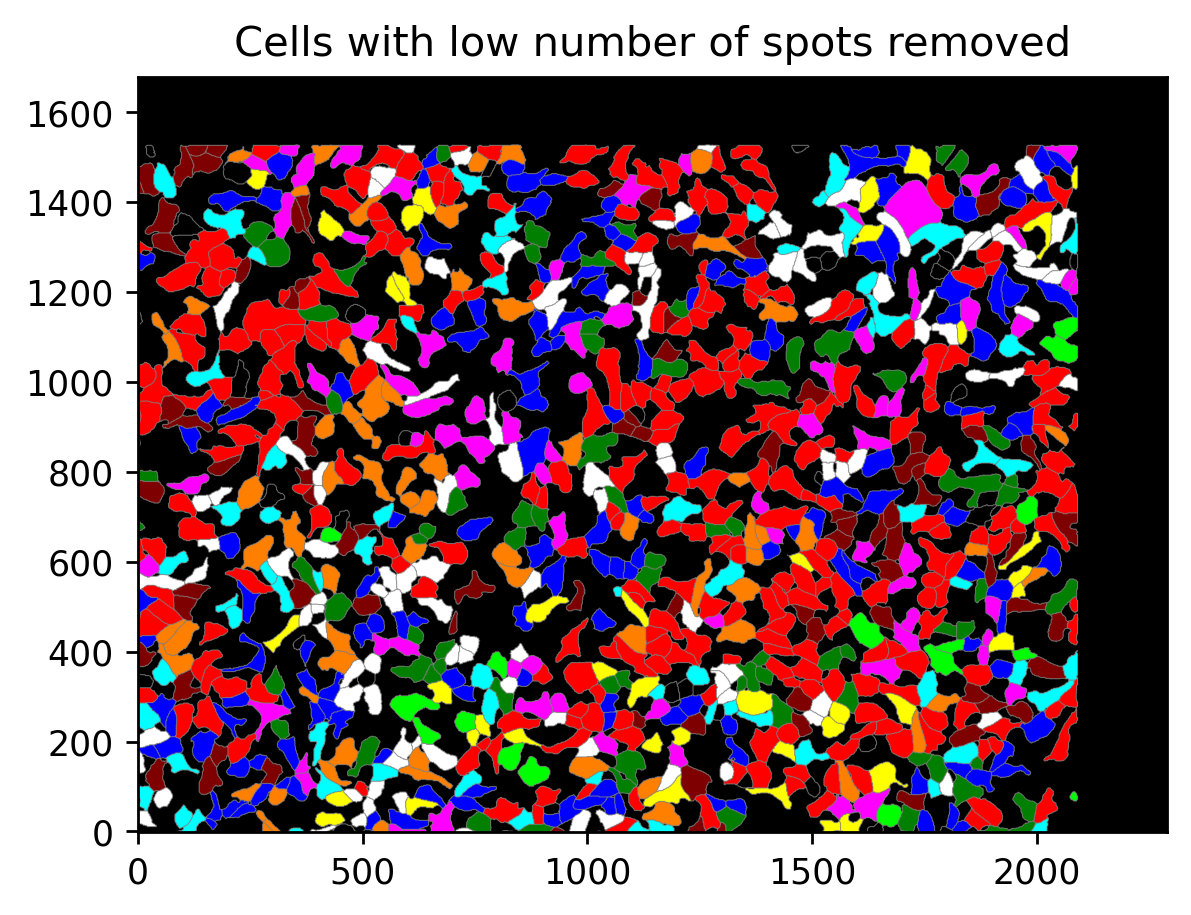

In [27]:
no_low = df_cell_id.barcode[df_cell_id.select_by_spots==True]
mask_color_nl = np.zeros((*masks_mem.shape, 3))
for i in no_low.index:
    if i>0:
        mask_color_nl[np.array(masks_mem)==i] = color_dict[no_low[i]]
mask_color_nl = mask_color_nl[up:down, left:right]
mask_color_nl[find_boundaries(masks_mem[up:down, left:right]),] = (127, 127, 127)
plt.figure(dpi=250)
plt.imshow(mask_color_nl.astype(np.uint8), origin='lower')
plt.title('Cells with low number of spots removed')

## Finally selected
fs

Text(0.5, 1.0, 'Selected cells')

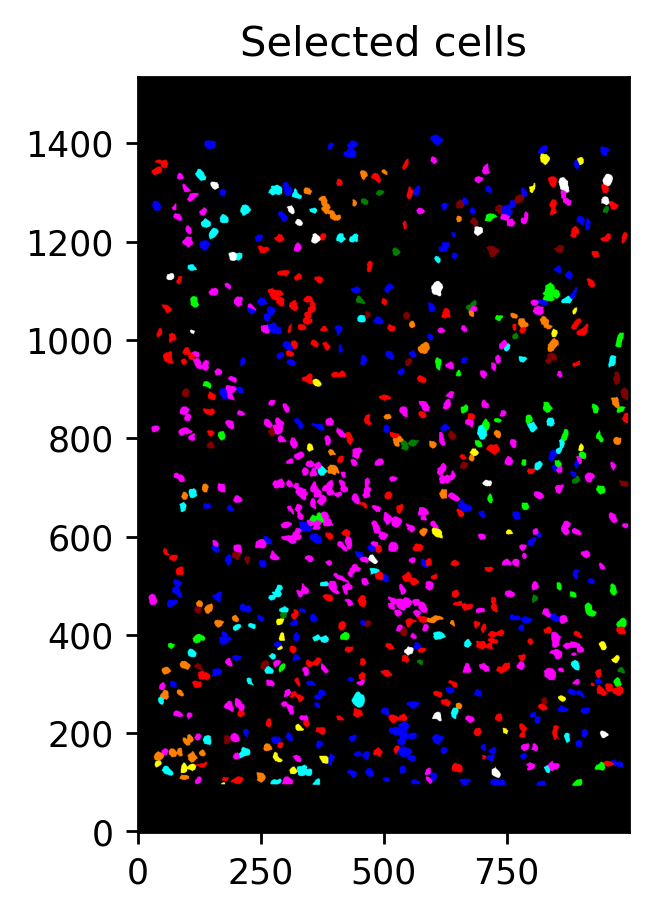

In [12]:
no_low = df_cell_id.barcode[df_cell_id.selected==True]
mask_color_nl = np.zeros((*masks_mem.shape, 3))
for i in no_low.index:
    if i>0:
        mask_color_nl[np.array(masks_mem)==i] = color_dict[no_low[i]]

plt.figure(dpi=250)
plt.imshow(mask_color_nl.astype(np.uint8), origin='lower')
plt.title('Selected cells')